In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stat
import seaborn as seabornInstance 

In [9]:
def convert_to_datstring(file):
    f = pd.read_csv(file,header=0,sep=';')
    f.columns = f.columns.str.lstrip()
    f['date'] =  pd.to_datetime(f['MESS_DATUM'], format='%Y%m%d%H%M')
    f["months"] = f["MESS_DATUM"].astype(str).str.slice(4,6)
    f["days"] = f["MESS_DATUM"].astype(str).str.slice(6,8)
    f["days_series"] = f["MESS_DATUM"].astype(str).str.slice(0,8)
    f['days_series'] =  pd.to_datetime(f['days_series'], format='%Y%m%d')
    f["hours"] = f["MESS_DATUM"].astype(str).str.slice(8,10)
    f["hours_series"] = f["MESS_DATUM"].astype(str).str.slice(0,10)
    f['hours_series'] =  pd.to_datetime(f['hours_series'], format='%Y%m%d%H')
    return f
df=convert_to_datstring('produkt_zehn_min_tu_20181004_20200405_03379.txt')

df.head()

,STATIONS_ID,MESS_DATUM,QN,PP_10,TT_10,TM5_10,RF_10,TD_10,eor,date,months,days,days_series,hours,hours_series
0,3379,201810040000,3,966.3,9.2,8.6,92.9,8.1,eor,2018-10-04 00:00:00,10,04,2018-10-04,00,2018-10-04
1,3379,201810040010,3,966.4,9.0,8.2,92.7,7.9,eor,2018-10-04 00:10:00,10,04,2018-10-04,00,2018-10-04
2,3379,201810040020,3,966.3,8.9,8.3,93.0,7.8,eor,2018-10-04 00:20:00,10,04,2018-10-04,00,2018-10-04
3,3379,201810040030,3,966.3,8.9,8.2,93.7,7.9,eor,2018-10-04 00:30:00,10,04,2018-10-04,00,2018-10-04
4,3379,201810040040,3,966.3,8.9,7.9,93.7,7.9,eor,2018-10-04 00:40:00,10,04,2018-10-04,00,2018-10-04


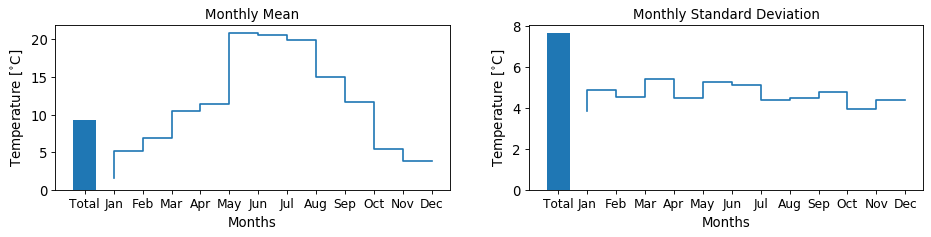

In [286]:
#Plotting Monthly Mean
months = ['Total','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig = plt.figure(figsize=(14,6),dpi=80, facecolor='w',edgecolor='k')
mean_monthly = df.groupby('months')['TT_10'].mean()
std_monthly = df.groupby('months')['TT_10'].std()
plt.subplot(221)
plt.bar(0,df.TT_10.mean())
plt.step(np.arange(1,13,1),mean_monthly)
plt.xticks(np.arange(0,13,1),months,fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.title('Monthly Mean',fontsize=12)
plt.subplot(222)
plt.bar(0,df.TT_10.std())
plt.step(np.arange(1,13,1),std_monthly)
plt.xticks(np.arange(0,13,1),months,fontsize=11)
plt.yticks(fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.title('Monthly Standard Deviation',fontsize=12)
plt.show()


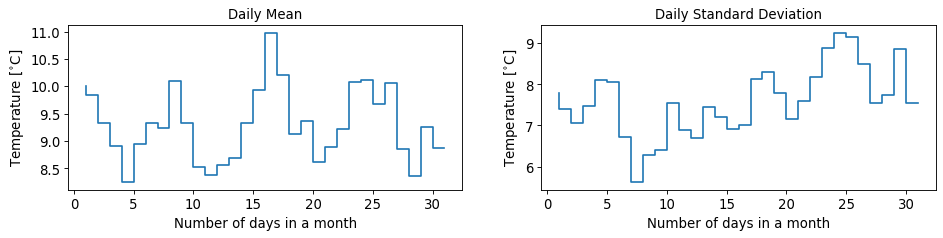

In [48]:
#Plotting Daily Mean
fig = plt.figure(figsize=(14,6),dpi=80, facecolor='w',edgecolor='k')
days_mean=df.groupby('days')['TT_10'].mean()
days_std=df.groupby('days')['TT_10'].std()
plt.subplot(221)
plt.step(np.arange(1,32,1),days_mean)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of days in a month', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.title('Daily Mean',fontsize=12)

plt.subplot(222)
plt.step(np.arange(1,32,1),days_std)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Number of days in a month', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.title('Daily Standard Deviation',fontsize=12)
plt.show()

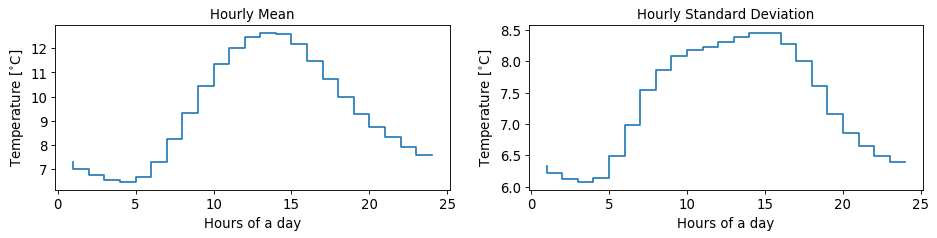

In [50]:
#Plotting Hourly Mean
fig = plt.figure(figsize=(14,6),dpi=80, facecolor='w',edgecolor='k')
hours_mean=df.groupby('hours')['TT_10'].mean()
hours_std=df.groupby('hours')['TT_10'].std()
plt.subplot(221)
plt.step(np.arange(1,25,1),hours_mean)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hours of a day', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.title('Hourly Mean',fontsize=12)

plt.subplot(222)
plt.step(np.arange(1,25,1),hours_std)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Hours of a day', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.title('Hourly Standard Deviation',fontsize=12)
plt.show()

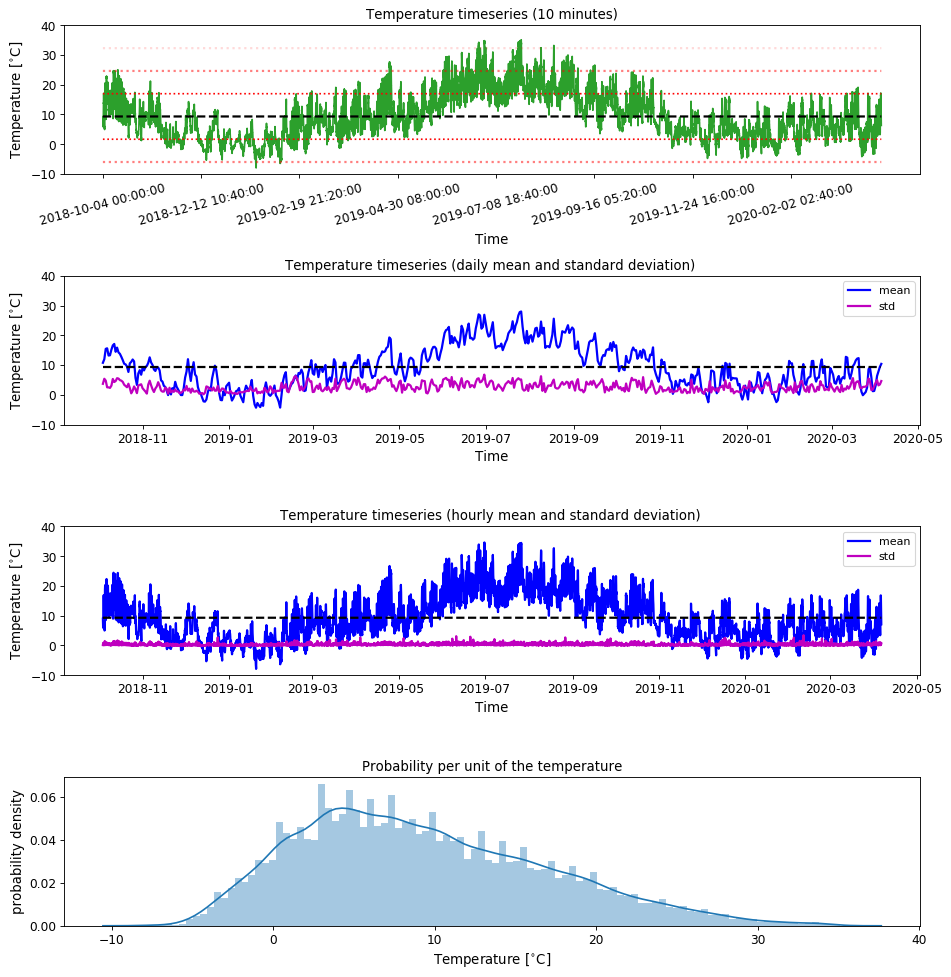

In [39]:
# Plotting Temperature timeseries 
L=len(df.TT_10)
t=np.arange(1,L+1,1)

plt.figure(figsize=(12,12),dpi=80, facecolor='w',edgecolor='k')
plt.subplot(411)
plt.plot(t,df.TT_10,color='C2')
plt.plot(t,df.TT_10.mean()*np.ones(L),'--k',linewidth=2)
plt.plot(t,(df.TT_10.mean() - df.TT_10.std())*np.ones(L),':r')
plt.plot(t,(df.TT_10.mean() + df.TT_10.std())*np.ones(L),':r')

plt.plot(t,(df.TT_10.mean() - 2*df.TT_10.std())*np.ones(L),':r',alpha=0.5,linewidth=2)
plt.plot(t,(df.TT_10.mean() + 2*df.TT_10.std())*np.ones(L),':r',alpha=0.5,linewidth=2)

#extreme events
plt.plot(t,(df.TT_10.mean() - 3*df.TT_10.std())*np.ones(L),':r',alpha=0.15,linewidth=2)
plt.plot(t,(df.TT_10.mean() + 3*df.TT_10.std())*np.ones(L),':r',alpha=0.15,linewidth=2)

plt.title('Temperature timeseries (10 minutes)', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.xticks(t[0:L:10000],df.date[0:L:10000],rotation=15,fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-10,40)
plt.xlabel('Time', fontsize=12)

##############################################################
plt.subplot(412)
days_meanseries=df.groupby('days_series')['TT_10'].mean()
days_stdseries=df.groupby('days_series')['TT_10'].std()
plt.plot(days_meanseries,'b',linewidth=2,label='mean')
plt.plot(days_stdseries,'m',linewidth=2,label='std')
plt.plot(days_meanseries.index,days_meanseries.mean()*np.ones(len(days_meanseries)),'--k',linewidth=2)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=1)
plt.title('Temperature timeseries (daily mean and standard deviation) ', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-10,40)
plt.legend(fontsize=10)

##############################################################
plt.subplot(413)
hours_meanseries=df.groupby('hours_series')['TT_10'].mean()
hours_stdseries=df.groupby('hours_series')['TT_10'].std()
plt.plot(hours_meanseries,'b',linewidth=2,label='mean')
plt.plot(hours_stdseries,'m',linewidth=2,label='std')
plt.plot(hours_meanseries.index,hours_meanseries.mean()*np.ones(len(hours_meanseries)),'--k',linewidth=2)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=1)
plt.title('Temperature timeseries (hourly mean and standard deviation) ', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylim(-10,40)
plt.legend(fontsize=10)

##############################################################
plt.subplot(414)
plt.tight_layout()
seabornInstance.distplot(df['TT_10'],norm_hist=True, bins=100)
plt.title('Probability per unit of the temperature',fontsize=12)
plt.xlabel(r'Temperature [$^{\circ}$C]', fontsize=12)
plt.ylabel('probability density',fontsize=12)
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.5)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [52]:
def pres_alt(pressure):
    alt = 44331.5 - 4946.62 * pressure ** (0.190263)
    return alt/10000
at=[]
for i in df.loc[:, 'PP_10'].values:
    at.append(pres_alt(i))

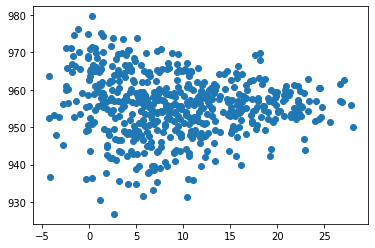

In [60]:
plt.scatter(days_meanseries_t,days_meanseries_p)

In [61]:
np.corrcoef(days_meanseries_t,days_meanseries_p)

array([[ 1.        , -0.07968376],
       [-0.07968376,  1.        ]])

In [74]:
df.head()

,STATIONS_ID,MESS_DATUM,QN,PP_10,TT_10,TM5_10,RF_10,TD_10,eor,date,months,days,days_series,hours,hours_series
0,3379,201810040000,3,966.3,9.2,8.6,92.9,8.1,eor,2018-10-04 00:00:00,10,04,2018-10-04,00,2018-10-04
1,3379,201810040010,3,966.4,9.0,8.2,92.7,7.9,eor,2018-10-04 00:10:00,10,04,2018-10-04,00,2018-10-04
2,3379,201810040020,3,966.3,8.9,8.3,93.0,7.8,eor,2018-10-04 00:20:00,10,04,2018-10-04,00,2018-10-04
3,3379,201810040030,3,966.3,8.9,8.2,93.7,7.9,eor,2018-10-04 00:30:00,10,04,2018-10-04,00,2018-10-04
4,3379,201810040040,3,966.3,8.9,7.9,93.7,7.9,eor,2018-10-04 00:40:00,10,04,2018-10-04,00,2018-10-04


In [95]:
x=df.groupby('days_series')['TT_10'].mean()
y=df.groupby('days_series')['TD_10'].mean()

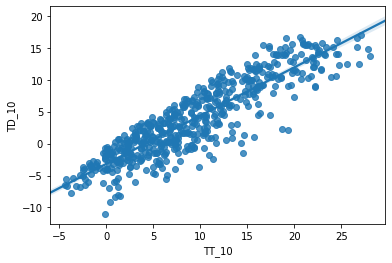

In [96]:
import pandas as pd
#x, y = pd.Series(x, days_meanseries_t), pd.Series(y, days_meanseries_p)
seabornInstance.regplot(x, y, marker="o")

In [79]:
np.corrcoef(x,y)

array([[ 1.       , -0.2718239],
       [-0.2718239,  1.       ]])